In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [1]:
from sklearn.neural_network import MLPClassifier
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
y=y.values.ravel()
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)
# prepare the cross-validation procedure

#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=41)
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=500)

parameter_space = {
    'hidden_layer_sizes': [(22, 50,25),(25,25,40),(50,50,50), (50,100,50), (100,),(100,100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)


print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

# Best paramete set
#print('Best parameters found:\n', clf.best_params_)

# All results
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))



Tuned Hyperparameters : {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
Accuracy : 0.9379446640316205


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Tuned Hyperparameters : {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
#Accuracy : 0.9379446640316205

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#x_test = lda.transform(x_test)

D:\PhD\anaconda38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [21]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='relu',alpha=0.05,solver='sgd', learning_rate= 'constant',
                    hidden_layer_sizes=(50,50,50), random_state=1)



In [22]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)



In [23]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1, 1, 3, 1, 4, 4, 2, 1, 4, 2, 2, 4, 4, 2, 1, 4, 2, 2, 1, 4, 4, 2,
       4, 2, 3, 3, 2, 3, 1, 4, 1, 1, 2, 4, 3, 1, 3, 3, 1, 1, 2, 1, 4, 4,
       1], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
print("accuracy is:{0:.2f}%".format(accuracy_score(y_test,y_pred)*100))


accuracy is:88.89%


In [25]:
clf.score(x_test,y_test)

0.8888888888888888

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8888888888888888

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.91      0.77      0.83        13
           3       0.86      0.75      0.80         8
           4       0.92      1.00      0.96        12

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



In [28]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

Accuracy of MLPClassifier : ''  0.8888888888888888


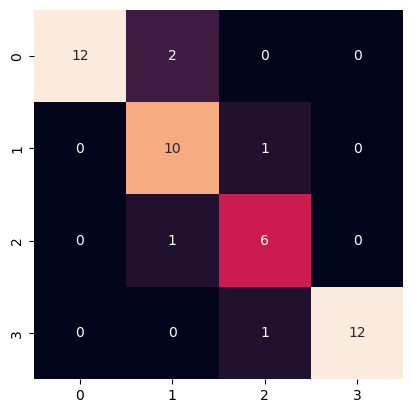

In [29]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

print("Accuracy of MLPClassifier : '' ", accuracy(mat))

In [ ]:
#training and validation accuracy

In [30]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

Accuracy: 87.667 (4.485)


In [34]:
#Test Accuracy
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.91      0.77      0.83        13
           3       0.86      0.75      0.80         8
           4       0.92      1.00      0.96        12

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

def cross_validation(model,x,y, cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1_macro': make_scorer(f1_score, average = 'micro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
                      }



result = cross_validation(clf, x_train,y_train, 5)
print(result)

{'Training Accuracy scores': array([0.89285714, 0.89285714, 0.89285714, 0.9047619 , 0.91666667]), 'Validation Accuracy scores': array([0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.80952381]), 'Training Precision scores': array([0.89285714, 0.89285714, 0.89285714, 0.9047619 , 0.91666667]), 'Validation Precision scores': array([0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.80952381]), 'Training Recall scores': array([0.89285714, 0.89285714, 0.89285714, 0.9047619 , 0.91666667]), 'Validation Recall scores': array([0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.80952381]), 'Training F1 scores': array([0.89285714, 0.89285714, 0.89285714, 0.9047619 , 0.91666667]), 'Validation F1 scores': array([0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.80952381]), 'Mean Training Accuracy': 90.0, 'Mean Validation Accuracy': 87.6190476190476, 'Mean Training Precision': 0.9, 'Mean Validation Precision': 0.8761904761904761, 'Mean Training Recall': 0.9, 'Mean Validation Recall': 0.8761904761904

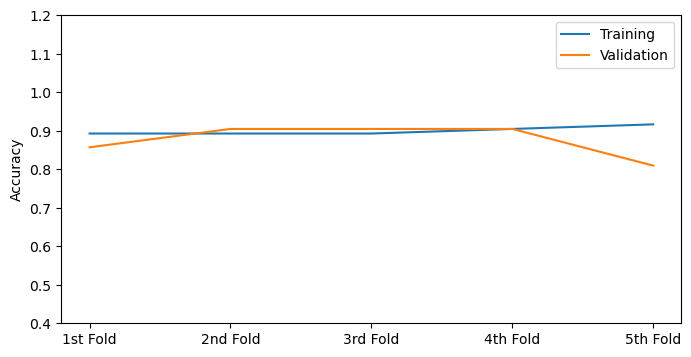

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(result["Training Accuracy scores"])
plt.plot(result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

Tuned Hyperparameters : {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy : 0.766403162055336


D:\PhD\anaconda38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
#y_pred=clf.predict(x_test)
#print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82         7
           2       0.57      0.57      0.57         7
           3       0.50      0.10      0.17        10
           4       0.57      0.89      0.70         9

    accuracy                           0.61        33
   macro avg       0.59      0.64      0.56        33
weighted avg       0.58      0.61      0.54        33



In [8]:

import numpy as np
def plot_result(x_label, y_label, plot_title, train_data, val_data):
               
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.2, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

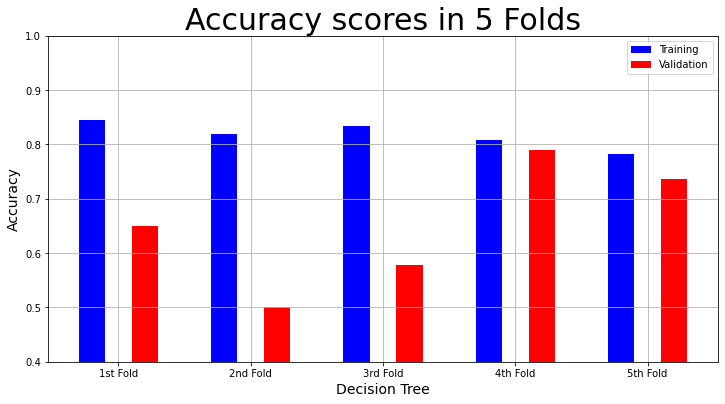

In [9]:
# Plot Accuracy Result
from matplotlib import pyplot as plt
%matplotlib inline
model_name = "Multilayer Perceptron"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            result["Training Accuracy scores"],
            result["Validation Accuracy scores"])